<a href="https://colab.research.google.com/github/n-zaheer/3nm4/blob/main/Copy_of_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Due EOD Thursday Oct 2nd

## Question 1

A nuclear fuel pellet is a cylinder, 1.5 cm in lenth and 1 cm in diameter. Assume the surface temperature is 300 C everywhere. Given temperature probe data below, determine the radial temperature profile in the middle of a nuclear fuel pellet (i.e.: T(r, z = 0.75)) using radial basis functions.


In [ ]:
import numpy as np

# 20 data points presented in columns: | x | y | z | T |, measurements in cm

data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

Consider what you know about this system. What extra information do you have in terms of

### a) type(s) of symmetry?

The type(s) of symmetry in this system is cylindrical (axial) and radial symmetry, since the nuclear fuel pellet is a cylinder, therefore suggesting axial symmetry around the axis. Also, since we are literally asked for the radial temperature profile in the middle of the pellet, and have a z value, there is radial symmetry in that plane.

### b) Boundary conditions?

The surface temperature is 300 C everywhere as given by the problem. Also, because of the radial symmetry, there is a boundary coundition of r=0 at the center.

## c) Plot the best guess of the radial temperature profile

Note: RBFs will fail with a linear solver error if two data points exactly overlap.

{Method, implementation, answer, answer}

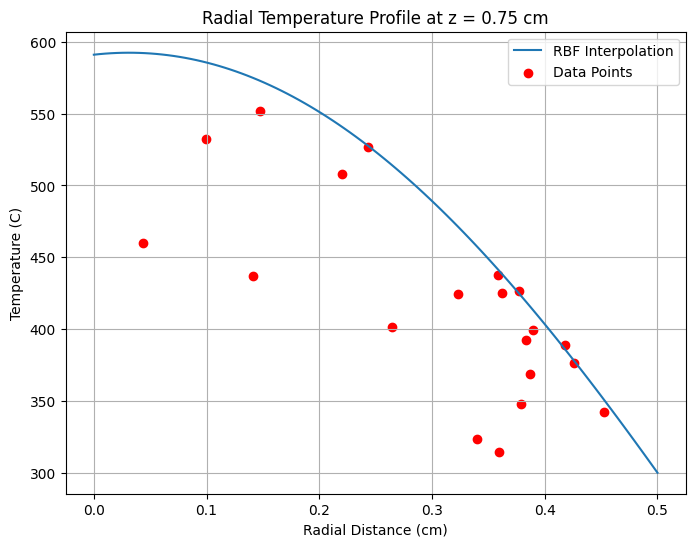

In [7]:
from scipy.spatial.distance import cdist
from scipy.linalg import solve
import matplotlib.pyplot as plt
import numpy as np

# Load the data
# 20 data points presented in columns: | x | y | z | T |, measurements in cm
data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

# Define the RBF kernel function (Gaussian RBF)
def gaussian_rbf(r, epsilon):
    return np.exp(-(epsilon * r)**2)

# Extract x, y, z coordinates and temperature T from the data
x, y, z, T = data[:, 0], data[:, 1], data[:, 2], data[:, 3]

# Calculate radial distance from the center (0,0)
r = np.sqrt(x**2 + y**2)

# Define the points for interpolation (along the radius at z = 0.75)
# We are considering the middle of the pellet, z = 0.75 cm
# The radius of the pellet is 0.5 cm (diameter is 1 cm)
r_interp = np.linspace(0, 0.5, 100)
z_interp = 0.75 * np.ones_like(r_interp)
x_interp = r_interp # Assuming we are plotting along the x-axis for visualization purposes
y_interp = np.zeros_like(r_interp) # Assuming we are plotting along the x-axis for visualization purposes

# Combine the data points and the boundary points
# The boundary condition is T = 300 C at r = 0.5 and any z. We'll add points at z=0.75
r_boundary = 0.5
z_boundary = 0.75
T_boundary = 300
# Add a few boundary points around the circumference at z=0.75
theta = np.linspace(0, 2*np.pi, 10)
x_boundary = r_boundary * np.cos(theta)
y_boundary = r_boundary * np.sin(theta)
z_boundary_points = z_boundary * np.ones_like(theta)
T_boundary_points = T_boundary * np.ones_like(theta)

# Combine all points (data and boundary)
all_x = np.concatenate((x, x_boundary))
all_y = np.concatenate((y, y_boundary))
all_z = np.concatenate((z, z_boundary_points))
all_T = np.concatenate((T, T_boundary_points))

# Create a matrix of distances between all pairs of points
dist_matrix = cdist(np.vstack([all_x, all_y, all_z]).T, np.vstack([all_x, all_y, all_z]).T, metric='euclidean')

# Choose an epsilon value for the RBF (this may require tuning)
epsilon = 1

# Calculate the RBF matrix
rbf_matrix = gaussian_rbf(dist_matrix, epsilon)


# Add a small regularization parameter to the diagonal
rbf_matrix += np.eye(rbf_matrix.shape[0]) * 1e-6


# Solve for the weights (lambda)
weights = solve(rbf_matrix, all_T)


# Create interpolation points in 3D space
interp_points = np.vstack([x_interp, y_interp, z_interp]).T


# Calculate distances between interpolation points and all data/boundary points
dist_interp_matrix = cdist(interp_points, np.vstack([all_x, all_y, all_z]).T, metric='euclidean')


# Calculate the RBF values for the interpolation points
rbf_interp_matrix = gaussian_rbf(dist_interp_matrix, epsilon)


# Calculate the interpolated temperature values
T_interp = np.dot(rbf_interp_matrix, weights)


# Plot the radial temperature profile
plt.figure(figsize=(8, 6))
plt.plot(r_interp, T_interp, label='RBF Interpolation')
plt.scatter(r, T, color='red', label='Data Points')
plt.xlabel('Radial Distance (cm)')
plt.ylabel('Temperature (C)')
plt.title('Radial Temperature Profile at z = 0.75 cm')
plt.legend()
plt.grid(True)
plt.show()



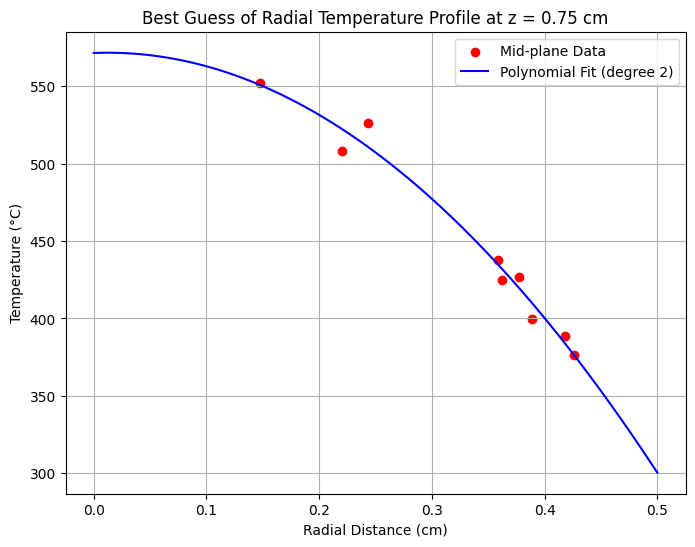

In [13]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.interpolate import RBFInterpolator
from sklearn.metrics import mean_squared_error
from numpy.polynomial.polynomial import Polynomial

data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

# Define the RBF kernel function (Gaussian RBF)
def gaussian_rbf(r, epsilon):
    return np.exp(-(epsilon * r)**2)

# Extract x, y, z, and T from the data
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
T = data[:, 3]

# Calculate radial distance from the center (0,0)
# Assuming the center of the cylinder is at (0,0) in the x-y plane
r = np.sqrt(x**2 + y**2)

# Filter data for points near the mid-plane (z = 0.75)
# The pellet length is 1.5 cm, so the middle is at z=0.75 cm.
mid_plane_tolerance = 0.3 # Tolerance around z = 0.75
mid_plane_mask = np.abs(z - 0.75) <= mid_plane_tolerance

r_mid = r[mid_plane_mask]
T_mid = T[mid_plane_mask]

# Perform a polynomial fit as a best guess for the profile
# A second-degree polynomial (quadratic) seems reasonable for a temperature profile in a cylinder
poly_degree = 2
poly_coeffs = np.polyfit(r_mid, T_mid, poly_degree)
poly = Polynomial(poly_coeffs[::-1]) # Reverse coeffs for Polynomial object

# Evaluate the polynomial on the radial range
R = 0.5 # Radius of the pellet is 1 cm diameter, so radius is 0.5 cm
Z_boundary = 0.75 # Mid-plane is at z = 0.75 cm
T_boundary = 300
r_eval = np.linspace(0, R, 100)
T_poly_eval = poly(r_eval)

# Plot the polynomial fit
plt.figure(figsize=(8, 6))
plt.scatter(r_mid, T_mid, color='red', label='Mid-plane Data')
plt.plot(r_eval, T_poly_eval, color='blue', label=f'Polynomial Fit (degree {poly_degree})')
plt.xlabel('Radial Distance (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Best Guess of Radial Temperature Profile at z = 0.75 cm')
plt.legend()
plt.grid(True)
plt.show()

# Question 2

You run an experiment and obtain the following data:

| x | y1 | y2 | y3 | y4 | y5 |
|---|---|---|---| --- | --- |
| 0.00 | -29.49 | -2.14 | 15.88 | 22.69 | 28.53 |
| 1.11 | 2.83 | 18.02 | -25.45 | -32.45 | 7.50 |
| 2.22 | 1.97 | -10.49 | -0.18 | -32.10 | -40.31 |
| 3.33 | -38.09 | -46.16 | -7.87 | -33.97 | -38.39 |
| 4.44 | -3.97 | -32.22 | -33.95 | -11.07 | -32.47 |
| 5.56 | 4.45 | -10.88 | 20.43 | 6.57 | -8.49 |
| 6.67 | 50.22 | 51.29 | 80.02 | 66.15 | 84.90 |
| 7.78 | 164.11 | 190.26 | 160.94 | 182.35 | 163.18 |
| 8.89 | 331.75 | 306.51 | 278.40 | 302.13 | 335.44 |
| 10.00 | 517.06 | 483.20 | 476.73 | 512.16 | 500.64 |



In [ ]:
import numpy as np

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

## a) Determine the best cubic polynomial fit to this data with the uncertainty

{method, implementation, answer}

Best cubic polynomial fit:
P(x) = 0.8815x^3 + -2.5884x^2 + -13.0916x + 9.5258

Uncertainty of the coefficients (standard deviation):
Uncertainty of x^3 coefficient: ± 0.0656
Uncertainty of x^2 coefficient: ± 0.9997
Uncertainty of x coefficient:   ± 4.1592
Uncertainty of constant term:  ± 4.5400


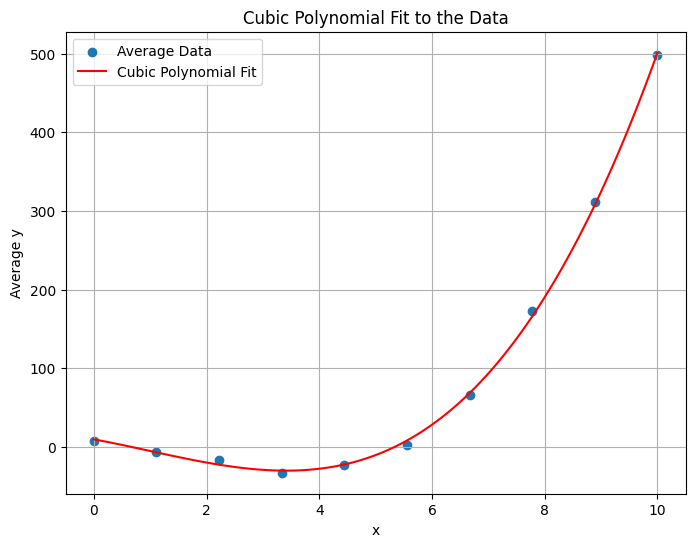

In [9]:
import numpy as np
import matplotlib.pyplot as plt

d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])


#extract x and the average of y1 through y5
x_data = d[:, 0]
y_data = np.mean(d[:, 1:], axis=1)

#cubic polynomial fit (degree=3)
#polyfit with full=True to get covariance matrix for uncertainty estimation
coeffs, cov_matrix = np.polyfit(x_data, y_data, 3, cov=True)

#find the polynomial function
poly_fit = np.poly1d(coeffs)

#calculate the standard deviation of the polynomial coefficients
coeff_stdev = np.sqrt(np.diag(cov_matrix))

print("Best cubic polynomial fit:")
print(f"P(x) = {coeffs[0]:.4f}x^3 + {coeffs[1]:.4f}x^2 + {coeffs[2]:.4f}x + {coeffs[3]:.4f}")
print("\nUncertainty of the coefficients (standard deviation):")
print(f"Uncertainty of x^3 coefficient: ± {coeff_stdev[0]:.4f}")
print(f"Uncertainty of x^2 coefficient: ± {coeff_stdev[1]:.4f}")
print(f"Uncertainty of x coefficient:   ± {coeff_stdev[2]:.4f}")
print(f"Uncertainty of constant term:  ± {coeff_stdev[3]:.4f}")

#plotting data
x_plot = np.linspace(x_data.min(), x_data.max(), 100)
y_plot = poly_fit(x_plot)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Average Data')
plt.plot(x_plot, y_plot, color='red', label='Cubic Polynomial Fit')
plt.xlabel('x')
plt.ylabel('Average y')
plt.title('Cubic Polynomial Fit to the Data')
plt.legend()
plt.grid(True)
plt.show()

## b) Your manager thinks this should be a quadratic. Which do you think it should be and why?

Looking at the data and plots below, it seems that my boss might not like me, since the cubic polynomial fit is better than the quadratic fit. The Mean Squared Error of the cubic fit (15.02) is much lower than the Mean Squared Error of the quadratic fit (466.9), therefore suggesting the cubic fit is more precise. Additionally, the average data points follow the line of the cubic polynomial fit on the graph more closely than it does for the quadratic, therefore also suggesting more accuracy.

Mean Squared Error for Cubic Fit: 15.0171
Mean Squared Error for Quadratic Fit: 466.8824


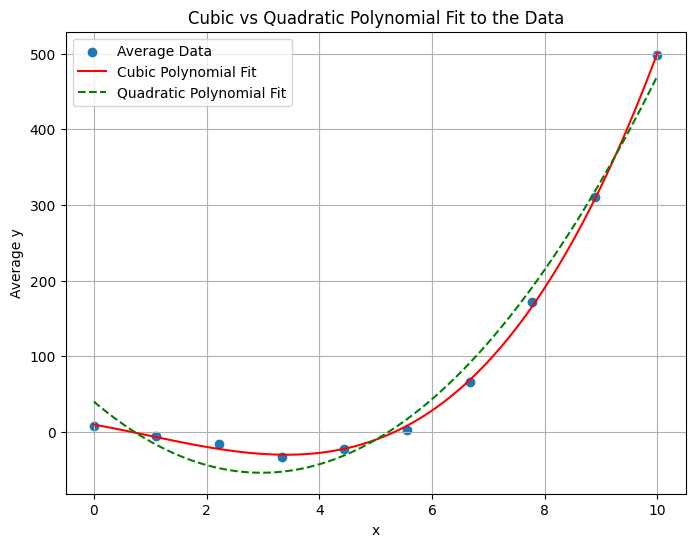

In [10]:
#quadratic polynomial fit (degree=2)
coeffs_quad = np.polyfit(x_data, y_data, 2)
poly_fit_quad = np.poly1d(coeffs_quad)

#get the Mean Squared Error for both fits for comparison
y_cubic_pred = poly_fit(x_data)
y_quad_pred = poly_fit_quad(x_data)

mse_cubic = mean_squared_error(y_data, y_cubic_pred)
mse_quad = mean_squared_error(y_data, y_quad_pred)

print(f"Mean Squared Error for Cubic Fit: {mse_cubic:.4f}")
print(f"Mean Squared Error for Quadratic Fit: {mse_quad:.4f}")

#plot both degrees for the visual comparison
x_plot = np.linspace(x_data.min(), x_data.max(), 100)
y_plot_cubic = poly_fit(x_plot)
y_plot_quad = poly_fit_quad(x_plot)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Average Data')
plt.plot(x_plot, y_plot_cubic, color='red', label='Cubic Polynomial Fit')
plt.plot(x_plot, y_plot_quad, color='green', linestyle='--', label='Quadratic Polynomial Fit')
plt.xlabel('x')
plt.ylabel('Average y')
plt.title('Cubic vs Quadratic Polynomial Fit to the Data')
plt.legend()
plt.grid(True)
plt.show()